# Class Project
### Description
This data set consists of three types of entities: (a) the specification of an auto in terms of various
characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to
other cars. The second rating corresponds to the degree to which the auto is more risky than its
price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is
more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this
process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.
The third factor is the relative average loss payment per insured vehicle year. This value is
normalized for all autos within a particular size classification (two-door small, station wagons,
sports/speciality, etc...), and represents the average loss per car per year.
Attribute Information:
Attribute: Attribute Range
1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo
4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

The idea of this project is to predict the insurance risk rating of a car as well as characterizing the
different segments of the population.
Steps to follow
1. Cleaning and EDA: Check for data quality issues.
You must evaluate the quality of the data, as well as understanding the relationship between features and the target variable.
2. Predictive models: Train predictive models (at least 3) that will allow you to estimate the insurance risk rating of a car from the values of the other variables. Choose the best model, looking for its optimal parameters.
You must include a section in which you establish the evaluation protocols and the models’ training and evaluation processes.
3. Dimensionality reduction: Considering all the variables, perform a principal component analysis (PCA), choosing the number of components necessary to preserve at least 80% of the original representation.
4. Characterizing the cars: With the data in its new representation, perform a segmentation, establishing the best number of clusters between 3 and 5. Characterize the clusters with respect to the original variables.

## // Si ven esto desde Google Collab, ordenamos todo con la tabla de contenido usando headers de Mark-Down para mejor navegacion.

## **1. CLEANING AND EDA**

### Importar y ordenar datos

In [ ]:
from google.colab import drive

import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import math #matematica
import matplotlib.pyplot as plt #gráficos
import seaborn as sns #graficas
from sklearn import datasets #modelos
from sklearn import neighbors, metrics
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.model_selection import cross_val_score, cross_validate #método para evaluar varios particionamientos de C-V
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold, LeaveOneOut #Iteradores de C-V

In [ ]:
import warnings
warnings.filterwarnings('ignore')



---



In [ ]:
column_names = ["Symbolizing","Normalized_losses", "Make", "Fuel_type", "Aspiration", 
                "Num_of_doors", "Body_style", "Drive_wheels", "Engine_location", 
                "Wheel_base", "Length", "Width", "Heigth", "Curb_weight", "Engine_type",
                "Num_of_cylinders", "Engine_size", "Fuel_system", "Bore", "Stroke",
                "Compression_ratio", "Horse_power", "Peak_rpm", "City_mpg", 
                "Highway_mpg", "Price"]
                

data = pd.read_csv('/content/imports-85.data', sep=',', names=column_names)


data.head()

,Symbolizing,Normalized_losses,Make,Fuel_type,Aspiration,Num_of_doors,Body_style,Drive_wheels,Engine_location,Wheel_base,...,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horse_power,Peak_rpm,City_mpg,Highway_mpg,Price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symbolizing        205 non-null    int64  
 1   Normalized_losses  205 non-null    float64
 2   Make               205 non-null    object 
 3   Fuel_type          205 non-null    object 
 4   Aspiration         205 non-null    object 
 5   Num_of_doors       205 non-null    object 
 6   Body_style         205 non-null    object 
 7   Drive_wheels       205 non-null    object 
 8   Engine_location    205 non-null    object 
 9   Wheel_base         205 non-null    float64
 10  Length             205 non-null    float64
 11  Width              205 non-null    float64
 12  Heigth             205 non-null    float64
 13  Curb_weight        205 non-null    int64  
 14  Engine_type        205 non-null    object 
 15  Num_of_cylinders   205 non-null    object 
 16  Engine_size        205 non

In [ ]:
data['Normalized_losses'] = pd.to_numeric(data['Normalized_losses'], errors = 'coerce')

to_convert = ['Bore', 'Stroke', 'Horse_power', 'Peak_rpm', 'Price']

for i in to_convert:
  data[i] = pd.to_numeric(data[i], errors = 'coerce')


In [ ]:
data['Normalized_losses'] = data['Normalized_losses'].fillna(0)

for i in to_convert:
  data[i] = data[i].fillna(0)


data["Normalized_losses"]

0        0.0
1        0.0
2        0.0
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: Normalized_losses, Length: 205, dtype: float64

###Baseline Global (Variable Dependiente)

<AxesSubplot:xlabel='Symbolizing', ylabel='count'>

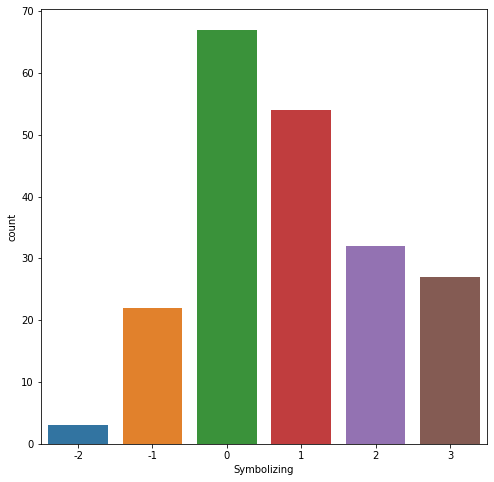

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x="Symbolizing", data=data)


Se puede observar que no hay ningun carro dentro del nivel de riesgo -3. Ademas, la cantidad de carros dentro de los niveles negativos hacen parte de la minoria significativa, la mayoria estando en 0 de adelante. 

Esto quiere decir que, al momento de predecir el nivel de riesgo, es posible que el modelo se equivoque mas en los valores negativos, ya que hay poca o inexistente cantidad de datos

### Cantidades Variables Categoricas

In [ ]:
cat_vars = ['Make', 'Fuel_type', 'Aspiration', 'Num_of_doors','Body_style', 'Drive_wheels', 'Engine_location', 'Engine_type', 'Fuel_system', 'Num_of_cylinders']


#### Make

<AxesSubplot:xlabel='Make', ylabel='count'>

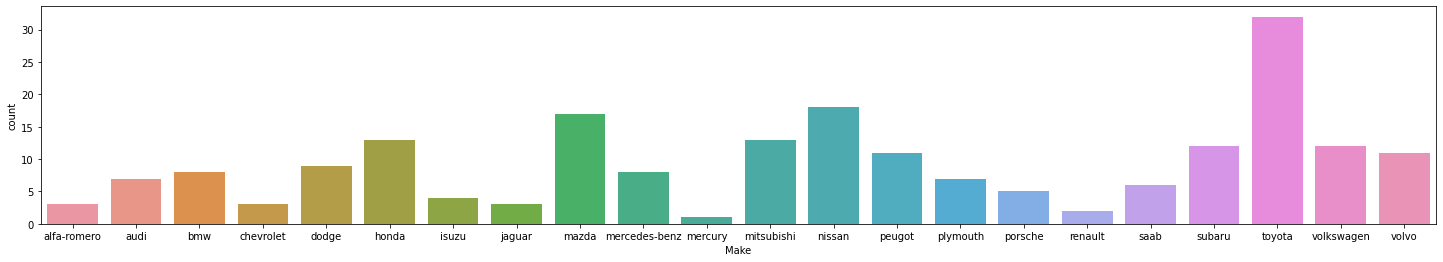

In [ ]:
plt.figure(figsize=(25,4))
sns.countplot(x=cat_vars[0], data=data)

El modelo tendra mas informacion sobre carros de marca toyota que de marca mercurio o renault

#### Fuel_type

<AxesSubplot:xlabel='Fuel_type', ylabel='count'>

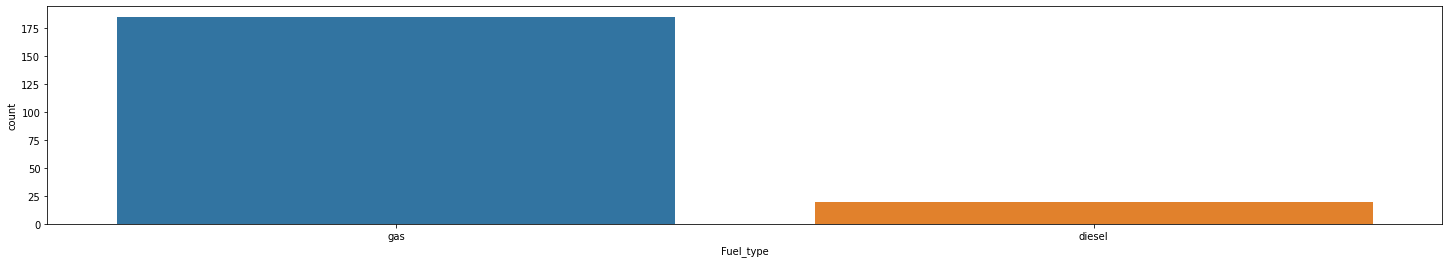

In [ ]:
plt.figure(figsize=(25,4))
sns.countplot(x=cat_vars[1], data=data)

In [ ]:
pd.crosstab(index=data["Fuel_type"], columns="count")

col_0,count
Fuel_type,
diesel,20
gas,185


la gran mayoria de carros utilizan gas. En el caso que la correlacion entre riesgo cuando se utilice diesel no sea significante, esta variable puede que no sea muy util

#### Aspiration

<AxesSubplot:xlabel='Aspiration', ylabel='count'>

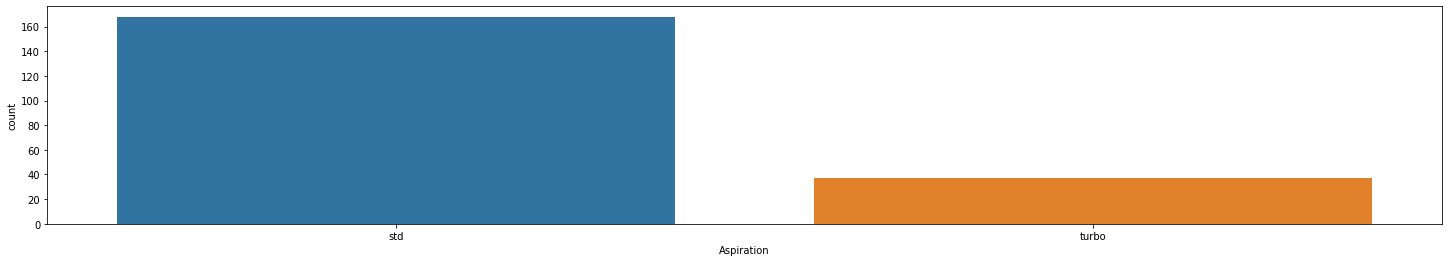

In [ ]:
plt.figure(figsize=(25,4))
sns.countplot(x=cat_vars[2], data=data)

De forma similar al punto anterior, seria importante enfocarse en esta variable si el uso de turbo aumenta o disminuye el riesgo repetitivamente

#### Num_of_doors

<AxesSubplot:xlabel='Num_of_doors', ylabel='count'>

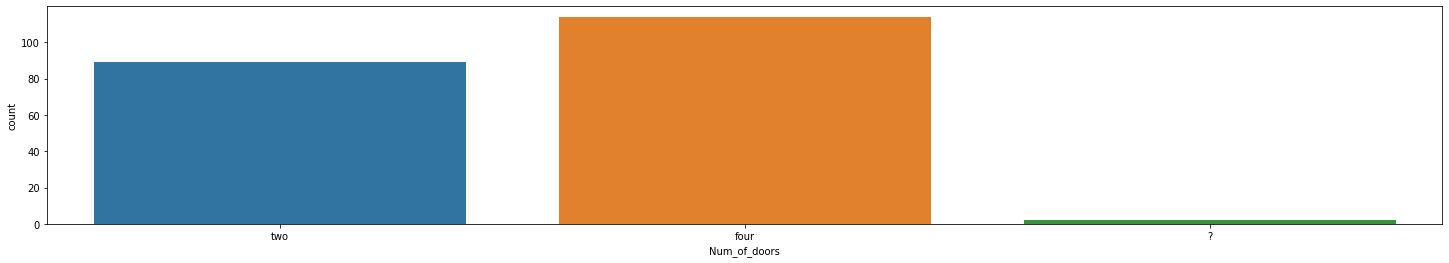

In [ ]:
plt.figure(figsize=(25,4))
sns.countplot(x=cat_vars[3], data=data)

In [ ]:
pd.crosstab(index=data["Num_of_doors"], columns="count")

col_0,count
Num_of_doors,
?,2
four,114
two,89


Aqui empiezan a aparecer los errores, por el lado de las variables cualitativas. La cantidad de estos es minima, asi que no es necesario borrar la variable entera. Sin embargo, ya que un vehiculo utiliza pares de ruedas, se podra suponer que el campo (?) significa "seis o mas" o "anormal". Aun asi, seria una poblacion muy pequeña para generar un peso significativo en el modelo

#### Body_style

<AxesSubplot:xlabel='Body_style', ylabel='count'>

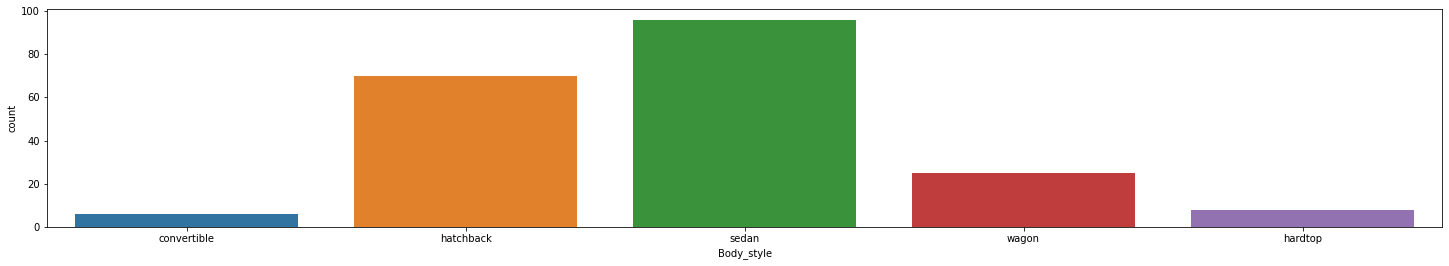

In [ ]:
plt.figure(figsize=(25,4))
sns.countplot(x=cat_vars[4], data=data)

Similar a los primeros puntos analizados, hay poca cantidad de convertibles y "coraza dura".

#### Drive_wheels

<AxesSubplot:xlabel='Drive_wheels', ylabel='count'>

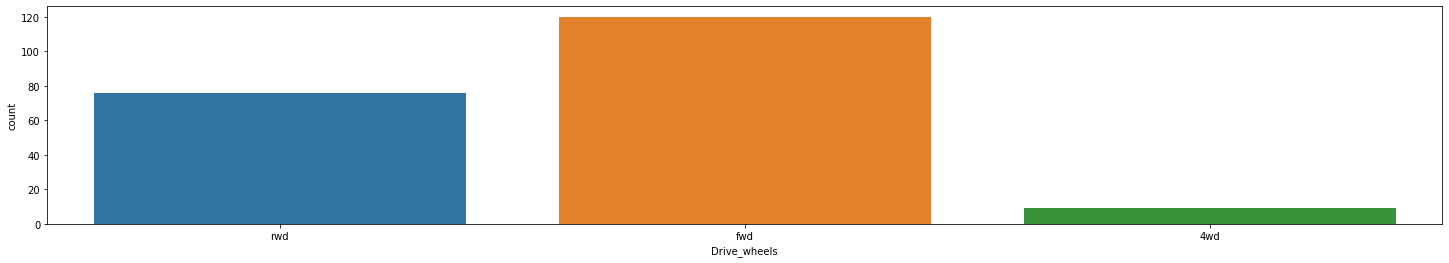

In [ ]:
plt.figure(figsize=(25,4))
sns.countplot(x=cat_vars[5], data=data)

nada nuevo...

#### Engine_location

<AxesSubplot:xlabel='Engine_location', ylabel='count'>

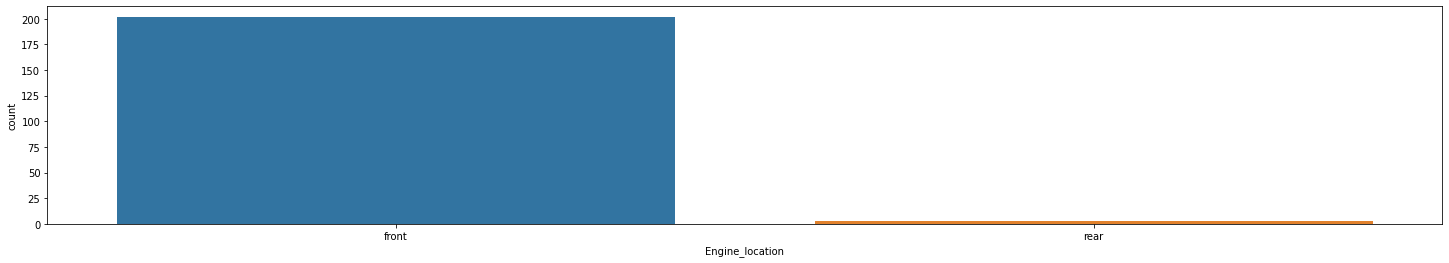

In [ ]:
plt.figure(figsize=(25,4))
sns.countplot(x=cat_vars[6], data=data)

In [ ]:
pd.crosstab(index=data["Engine_location"], columns="count")

col_0,count
Engine_location,
front,202
rear,3


Aqui, la cantidad de carros con el motor en la parte de atras es minuscula. Se podria considerar, si estos carros generan errores repetitivamente en otros campos, borrar estos 3 valores sin mucha repercusion

#### Engine_type

<AxesSubplot:xlabel='Engine_type', ylabel='count'>

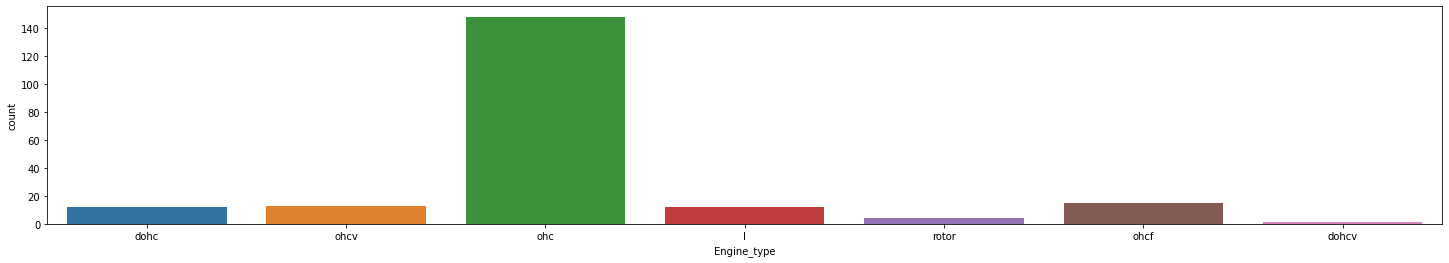

In [ ]:
plt.figure(figsize=(25,4))
sns.countplot(x=cat_vars[7], data=data)

In [ ]:
pd.crosstab(index=data["Engine_type"], columns="count")

col_0,count
Engine_type,
dohc,12
dohcv,1
l,12
ohc,148
ohcf,15
ohcv,13
rotor,4


Aqui, el tipo de motor principal es ohc, y por mucho (en promedio 10 veces mayor en comparacion a los demas). En el otro extremo, solo un vehiculo utiliza dohcv, y 4 utilizan rotor.

Una solucion para la diferencia masiva entre estos valores podria ser unificar las columnas de esta variable, de manera que solo hayan dos: vehiculos que utilicen ohc, y vehiculos que no.

#### Fuel_system

<AxesSubplot:xlabel='Fuel_system', ylabel='count'>

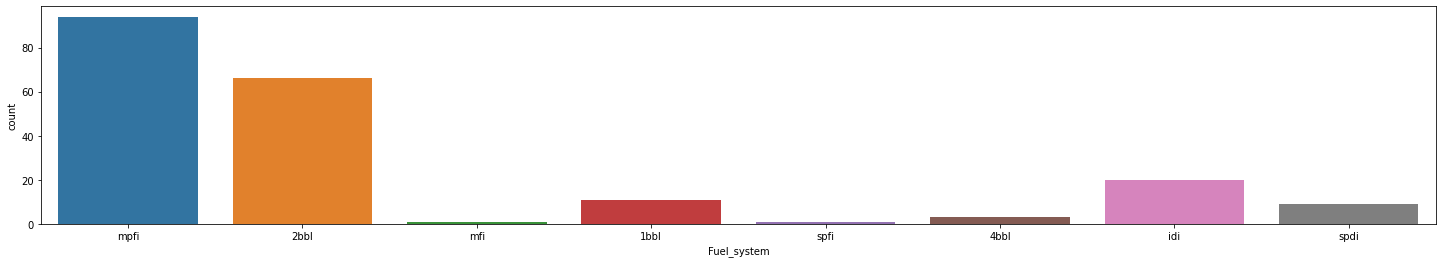

In [ ]:
plt.figure(figsize=(25,4))
sns.countplot(x=cat_vars[8], data=data)

In [ ]:
pd.crosstab(index=data["Fuel_system"], columns="count")

col_0,count
Fuel_system,
1bbl,11
2bbl,66
4bbl,3
idi,20
mfi,1
mpfi,94
spdi,9
spfi,1


Esta variable puede ser mas problematica que la anterior, ya que tiene valores extremadamanete pequeños (atipicos) como spfi, mfi y 4bbl, pero el resto de valores son significativamente grandes, comparados con el mas grande.

Dependiendo de la correlacion de esta variable con el riesgo, se podria cuestionar la importancia de algunos valores.

### Promedios Variables Cuantitativas

In [ ]:
cuant_var = ['Normalized_losses', 'Wheel_base', 'Length', 'Width', 'Heigth', 'Curb_weight', 'Engine_size', 'Bore', 'Stroke', 'Compression_ratio', 'Horse_power', 'Peak_rpm', 'City_mpg', 'Highway_mpg', 'Price']

#### Normalized_losses

In [ ]:
pvc = 0
print(cuant_var[pvc] + ": ", data[cuant_var[pvc]].mean())
pvc += 1

Normalized_losses:  97.6


In [ ]:
data.Normalized_losses

0        0.0
1        0.0
2        0.0
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: Normalized_losses, Length: 205, dtype: float64

Al estar mas cerca del rango inferior, en promedio, las perdidas normalizadas son menores en general.

Cabe recalcar que hay valores erroneos en esta variable. Resulta que hay celdas cuyo valor es igual a 0, lo cual esta fuera del rango aceptado. Esto posiblemente quiera decir que en este vehiculo no hubo perdidas.

In [ ]:
pvc_nl = 0
for i in data.Normalized_losses:
  if (i < 64 or i > 256): #por si hay valores que no sean 0 pero esten fuera del rango
    print(pvc_nl," : ",i)
  pvc_nl += 1

0  :  0.0
1  :  0.0
2  :  0.0
5  :  0.0
7  :  0.0
9  :  0.0
14  :  0.0
15  :  0.0
16  :  0.0
17  :  0.0
43  :  0.0
44  :  0.0
45  :  0.0
46  :  0.0
48  :  0.0
49  :  0.0
63  :  0.0
66  :  0.0
71  :  0.0
73  :  0.0
74  :  0.0
75  :  0.0
82  :  0.0
83  :  0.0
84  :  0.0
109  :  0.0
110  :  0.0
113  :  0.0
114  :  0.0
124  :  0.0
126  :  0.0
127  :  0.0
128  :  0.0
129  :  0.0
130  :  0.0
131  :  0.0
181  :  0.0
189  :  0.0
191  :  0.0
192  :  0.0
193  :  0.0


De hecho, la cantidad de carros cuyas perdidas es 0 es palpable, asi que no se deberia considerar borrar estas celdas.

#### Wheel_base

In [ ]:
print(cuant_var[pvc] + ": ", data[cuant_var[pvc]].mean())
pvc += 1

Wheel_base:  98.75658536585367


El tamaño de la rueda es promedio, acercandose a un tamaño menor, posiblemente signifique que hay mayor cantidad de carros pequeños

#### Length

In [ ]:
print(cuant_var[pvc] + ": ", data[cuant_var[pvc]].mean())
pvc += 1

Length:  174.04926829268288


El promedio esta cerca de la mitad del rango de longitud (~140 : 200), lo cual (al menos en la longitud) invalida el anterior argumento

#### Width

In [ ]:
print(cuant_var[pvc] + ": ", data[cuant_var[pvc]].mean())
pvc += 1

Width:  65.90780487804878


Lo mismo que el anterior...

#### Height

In [ ]:
print(cuant_var[pvc] + ": ", data[cuant_var[pvc]].mean())
pvc += 1

Heigth:  53.72487804878049


En promedio tiende (minimamente) hacia menor altura

#### Curb_weight

In [ ]:
print(cuant_var[pvc] + ": ", data[cuant_var[pvc]].mean())
pvc += 1

Curb_weight:  2555.5658536585365


Este promedio esta significativamente mas cerca al limite inferior. Quiere decir que esta muestra de carros es mas ligera.

#### Engine_size

In [ ]:
print(cuant_var[pvc] + ": ", data[cuant_var[pvc]].mean())
pvc += 1

Engine_size:  126.90731707317073


Este valor tambien esta mas cercano al rango inferior, lo que quiere decir que la mayoria de motores son pequeños

#### Bore

In [ ]:
print(cuant_var[pvc] + ": ", data[cuant_var[pvc]].mean())
pvc += 1

Bore:  3.264780487804878


Nada de importancia...

#### Stroke

In [ ]:
print(cuant_var[pvc] + ": ", data[cuant_var[pvc]].mean())
pvc += 1

Stroke:  3.19190243902439


En el medio...

#### Compression_ratio

In [ ]:
print(cuant_var[pvc] + ": ", data[cuant_var[pvc]].mean())
pvc += 1

Compression_ratio:  10.142536585365855


Muy cerca limite inferior

#### Horse_power

In [ ]:
print(cuant_var[pvc] + ": ", data[cuant_var[pvc]].mean())
pvc += 1

Horse_power:  103.2390243902439


En promedio los carros tienen menores caballos de fuerza que lo que espera el promedio. Posiblemente quiere decir que son carros mas domesticos

#### Peak_rpm

In [ ]:
print(cuant_var[pvc] + ": ", data[cuant_var[pvc]].mean())
pvc += 1

Peak_rpm:  5075.365853658536


Los rpm tambien son promedio

#### City_mpg

In [ ]:
print(cuant_var[pvc] + ": ", data[cuant_var[pvc]].mean())
pvc += 1

City_mpg:  25.21951219512195


Esto quiere decir que la mayoria de carros van por debajo del limite de velocidad

#### Highway_mpg

In [ ]:
print(cuant_var[pvc] + ": ", data[cuant_var[pvc]].mean())
pvc += 1

Highway_mpg:  30.75121951219512


Esta mas cercano al limite inferior. Quiere decir que estos carros no estan hechos para andar a altas velocidades en promedio

#### Price

In [ ]:
print(cuant_var[pvc] + ": ", data[cuant_var[pvc]].mean())
pvc += 1

Price:  12949.429268292683


En promedio, los carros son de menor precio, ya que no se acercan a los 55k

### Relacion entre variables **Categoricas** y Riesgo

#### Make

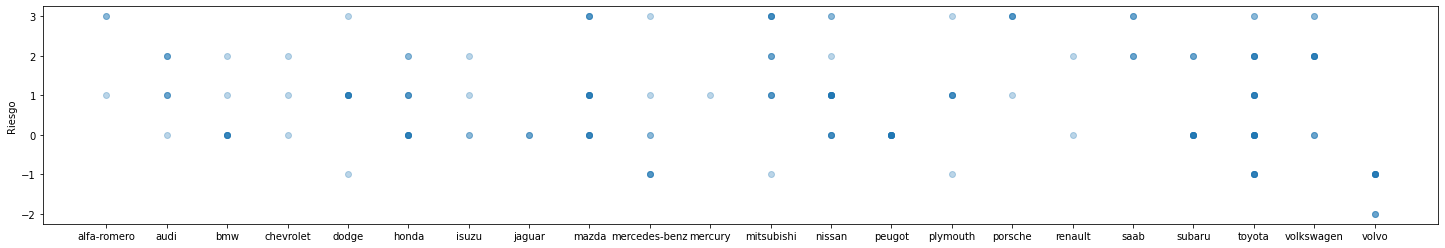

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(25,4))
ax.scatter(x=data[cat_vars[0]], y=data.Symbolizing, alpha= 0.3)
ax.set_ylabel('Riesgo');

Solo las marcas dodge, mercedes-benz, mitsubishi, plymouth, toyota y volvo tienen vehiculos dentro del rango de riesgo negativo.

Se podria predecir que, si un vehiculo hace parte de alguna de estas marcas, es probable que pueda tener un nivel de riesgo bajo o medio.

Por otro lado, las marcas alfa-romero, mercury y porsche estan fuera del rango negativo y medio de riesgo. Esto quiere decir que, probablemente, un carro manufacturado por esta marca es de alto riesgo.

#### Fuel_type

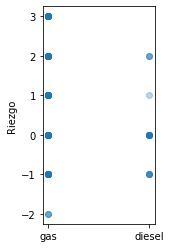

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(2,4))
ax.scatter(x=data[cat_vars[1]], y=data.Symbolizing, alpha= 0.3)
ax.set_ylabel('Riesgo');

Retomando las conclusiones en el analisis de las cantidades de variables categoricas, Se puede concluir que si es importante analizar la diferencia entre gas y diesel, ya que los vehiculos que utilizan gas pueden tener riesgo minimo y maximo, pero no cuando usan diesel, aunque hay mayor riesgo en esta columna.

#### Aspiration

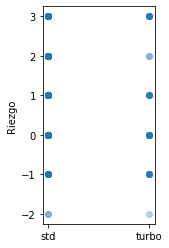

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(2,4))
ax.scatter(x=data[cat_vars[2]], y=data.Symbolizing, alpha= 0.3)
ax.set_ylabel('Riesgo');

Las dos columnas son relativamente similares, por ende, de por si, puede que no tengan mucha relevancia frente al cambio de riesgo, asi que tal vez no sea necesario analizarla.

#### Num_of_doors

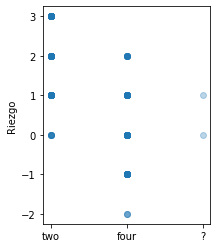

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(3,4))
ax.scatter(x=data[cat_vars[3]], y=data.Symbolizing, alpha= 0.3)
ax.set_ylabel('Riesgo');

Todos los vehiculos con dos puertas (o posiblemente seis o mas puertas) tienen un riesgo alto o medio, mientras que los vehiculos con cuatro puertas pueden tener el menor nivel de riesgo, pero no el mayor.

Quiere decir que es mas probable que un vehiculo sea menos riesgoso si tiene cuatro puertas

#### Body_style

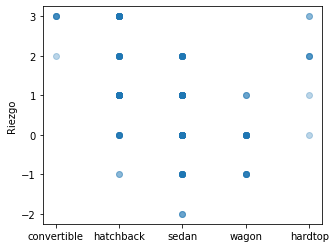

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5,4))
ax.scatter(x=data[cat_vars[4]], y=data.Symbolizing, alpha= 0.3)
ax.set_ylabel('Riesgo');

Esto hace que sea immportante notar a los convertibles y "coraza dura", ya que, pese a que son la minoria, se puede ver que tienen en promedio poco riesgo.

Por otro lado, los estilos de cuerpo sedan son los menos peligrosos

#### Drive_wheels

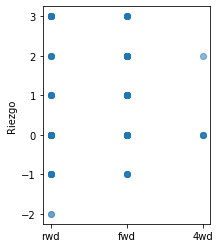

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(3,4))
ax.scatter(x=data[cat_vars[5]], y=data.Symbolizing, alpha= 0.3)
ax.set_ylabel('Riesgo');

No es muy seguro decir que 4wd es en promedio mas segura que las demas, ya que su cantidad de muestra es relativamente baja.

Ademas de esto, se puede decir que, asi sea por poco, fwd es mas seguro que rwd.

#### Engine_location

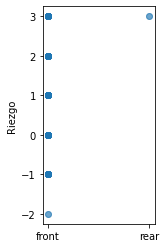

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(2,4))
ax.scatter(x=data[cat_vars[6]], y=data.Symbolizing, alpha= 0.3)
ax.set_ylabel('Riesgo');

La cantidad de datos en rear hace que no sea posible generar una conclusion valida respecto a su diferencia. 

Al tener valores en todos los modos de riesgo, puede que no sea pertinente analizar esta variable

#### Engine_type

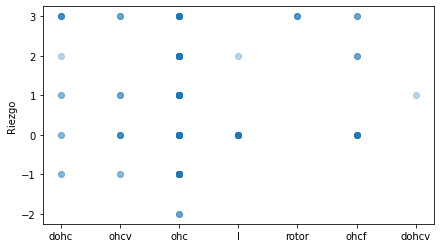

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7,4))
ax.scatter(x=data[cat_vars[7]], y=data.Symbolizing, alpha= 0.3)
ax.set_ylabel('Riesgo');

Ya que ohc tiene la mayor cantidad de datos, se podria decir que su correlacion con el riesgo es mas certera que los demas (especialmente dohcv, donde solo hay **1** carro).

Sin embargo, otra vez, esta conclusion podria cambiar si se analiza en vez dos columnas: es ohc, y no es ohc. Si se realizara este cambio, se podria concluir que los motores que no son de tipo ohc no llegan a tener un minimo nivel de riesgo, y tienen pocas incidencias en el penultimo nivel.

#### Fuel_system

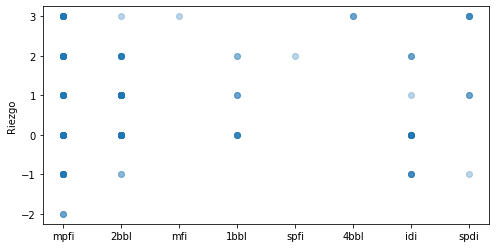

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax.scatter(x=data[cat_vars[8]], y=data.Symbolizing, alpha= 0.3)
ax.set_ylabel('Riesgo');

...lo mismo aqui, solo que mpfi tiene mas carros en el maximo nivel de riesgo que los demas sistemas de combustible (excepto spdi)

### Variables Normalizadas

In [ ]:
copy_of_data = data.copy()

for i in cuant_var:
  copy_of_data[i] = copy_of_data[i] /copy_of_data[i].abs().max()

print(copy_of_data)


     Symbolizing  Normalized_losses         Make Fuel_type Aspiration  \
0              3           0.000000  alfa-romero       gas        std   
1              3           0.000000  alfa-romero       gas        std   
2              1           0.000000  alfa-romero       gas        std   
3              2           0.640625         audi       gas        std   
4              2           0.640625         audi       gas        std   
..           ...                ...          ...       ...        ...   
200           -1           0.371094        volvo       gas        std   
201           -1           0.371094        volvo       gas      turbo   
202           -1           0.371094        volvo       gas        std   
203           -1           0.371094        volvo    diesel      turbo   
204           -1           0.371094        volvo       gas      turbo   

    Num_of_doors   Body_style Drive_wheels Engine_location  Wheel_base  ...  \
0            two  convertible          rwd  

### Correlacion Cuantitativas

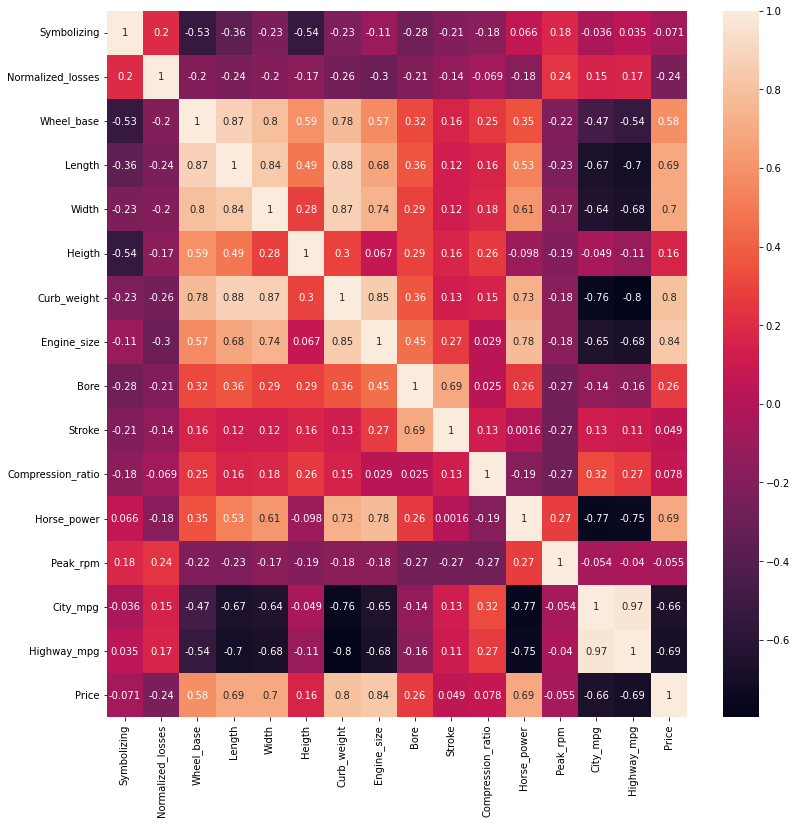

In [ ]:
corr_df = copy_of_data.corr(method="pearson")

plt.figure(figsize=(13, 13))
sns.heatmap(corr_df, annot=True)
plt.show()

existe una correlacion negativa importante entrela "wheel base" y "heigth" con la variable objetivo "symbolizing". mientras que por el lado contrario variables como "horse power", "city mpg", "highway mpg", etc; tienden tanto a cero que pueden resultar irrelevantes por su poca correlacion con la variable objetivo

hay otras variables que tienen una alta correlacion entre ellas lo cual nos puede ayudar a predecir datos faltantes en caso de verlo necesario.